## Content

[IMPORT LIBRARIES] (#-I.-IMPORT LIBRARIES )

# I. IMPORT LIBRARIES

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
#from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# II. IMPORT DATA

Steps include
*   Load the data from LoanStats.csv file to a DataFrame -> view the first 10 rows
*   Check the dimension (number of rows and columns) of the dataset
*   Check all variables and their data types and correct the data type if needed

In [2]:
# load data and view the first 10 rows
data = pd.read_csv("LoanStats.csv")
data.head(10)

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other
5,7.90,5000,36,A,RENT,36000.0,wedding
6,15.96,7000,60,C,RENT,47004.0,debt_consolidation
7,18.64,3000,36,E,RENT,48000.0,car
8,21.28,5600,60,F,OWN,40000.0,small_business
9,12.69,5375,60,B,RENT,15000.0,other


In [3]:
# check dataset dimension (number of rows and columns)
data.shape

(39786, 7)

In [4]:
# View all variables in the datset and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


Since all the variables are in their correct data type, no need to change anything

# III. DATA UNDERSTANDING

Summary of all steps that will be executed below
* Check for missing value -> no missing value
* Check for duplicates -> find 246 duplicates -> remove them later in Data Preparation
* Explore all variables 
    * target variable (int_rate)
        * all values & frequency
        * histogram & boxplot 
    * other variables with histogram
        * numeric variables (loan_amnt, term, annual_inc)
        * categorical variables (grade, home_ownership, purpose) 
    * Correlation between the variables and interest rate
        * heatmap for correlation between numeric variables (loan_amnt, term, annual_inc) and interest rate
        * encode categorical variables (grade, home_ownership, purpose) -> heatmap for correlation between all variables and interest rate

## 3.1 Missing Values

In [5]:
# Check to see if there is any missing values in the dataset
data.isnull().sum()

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

From the above results, there is no missing value in this dataset

## 3.2 Duplicates

In [6]:
# Check to see if there is any duplicate in the dataset
data.duplicated().sum()

246

In [7]:
# Display the 246 duplicates

# First, sort the data by int_rate and loan_amnt so that the duplicates will be displayed right next to each other later on 
data.sort_values(by=['int_rate','loan_amnt'], inplace=True) 

# Display all duplicates
data.loc[data.duplicated(keep = False),:]

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
12207,5.42,3000,36,A,MORTGAGE,58000.0,home_improvement
15981,5.42,3000,36,A,MORTGAGE,58000.0,home_improvement
16902,5.42,5000,36,A,RENT,60000.0,car
23611,5.42,5000,36,A,RENT,60000.0,car
11409,5.42,6000,36,A,MORTGAGE,70000.0,major_purchase
...,...,...,...,...,...,...,...
7930,21.36,24000,60,F,MORTGAGE,125000.0,debt_consolidation
11907,21.36,24000,60,F,MORTGAGE,125000.0,debt_consolidation
1858,22.35,35000,60,F,MORTGAGE,100000.0,debt_consolidation
6505,22.35,35000,60,F,MORTGAGE,100000.0,debt_consolidation


## 3.3 Explore variables

### 3.3.1. Target variable (int_rate)

In [8]:
#view the size and how many unique values for interest rate

data.int_rate.agg(['size', 'nunique'])

size       39786
nunique      371
Name: int_rate, dtype: int64

In [10]:
# Above, there is 371 unique values for interest rate
# Now, show all values and their frequency in interest rate 

data.int_rate.value_counts()

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
        ... 
16.71      1
16.20      1
16.15      1
16.01      1
24.59      1
Name: int_rate, Length: 371, dtype: int64

In [11]:
# Get the 10 most and 10 least common interest rate and their frequency

print('Top 10 most common interest rate and their frequencies\n')
print(data.int_rate.value_counts().head(10),'\n')

print ("-"*80)
print('Top 10 least most common interest rate and their frequencies\n')
print(data.int_rate.value_counts().tail(10))

Top 10 most common interest rate and their frequencies

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
7.49     656
11.71    609
9.99     603
7.90     582
5.42     573
Name: int_rate, dtype: int64 

--------------------------------------------------------------------------------
Top 10 least most common interest rate and their frequencies

22.64    1
17.34    1
21.48    1
14.67    1
16.96    1
16.71    1
16.20    1
16.15    1
16.01    1
24.59    1
Name: int_rate, dtype: int64


To get a clearer idea of the distribution of our target variable values (interest rate), visualize the data using histograms and box plots

Text(0.5, 0.98, 'Interest Rate Distribution')

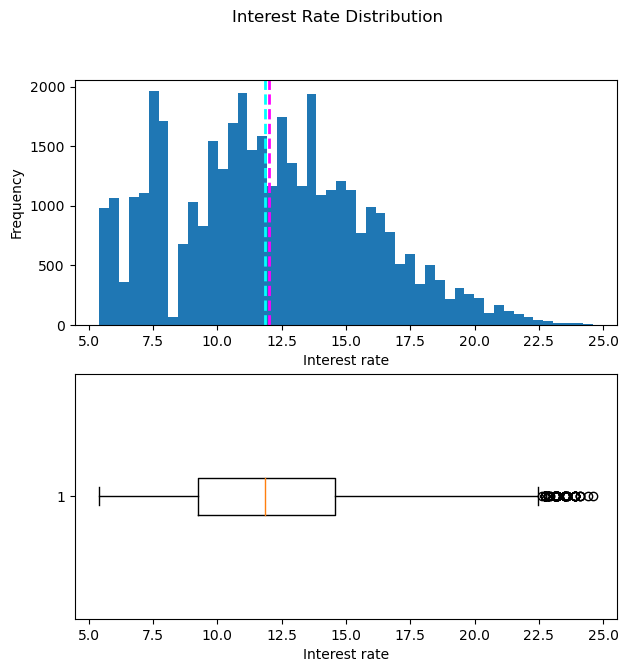

In [12]:
# Get the label column
label = data['int_rate']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (7,7))

# Plot the histogram   
ax[0].hist(label, bins=50)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Interest rate')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Interest rate')

# Add a title to the Figure
fig.suptitle('Interest Rate Distribution')

The plots show that the number of interest rate ranges from around 5.25% to close to 25%. Interest rate seems to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are. From the boxplot, we can see that there are some outlierse above 22.5% interest rate.

Next, We can do the same kind of visual exploration of other features.

### 3.3.2. Other variables

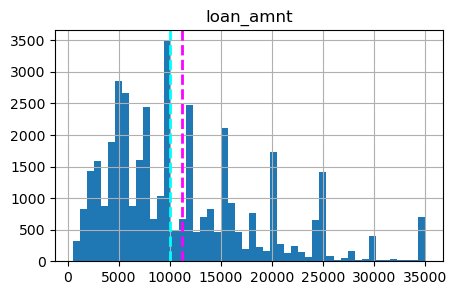

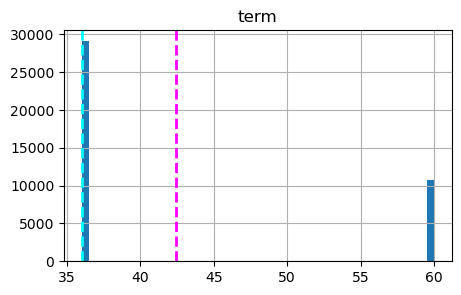

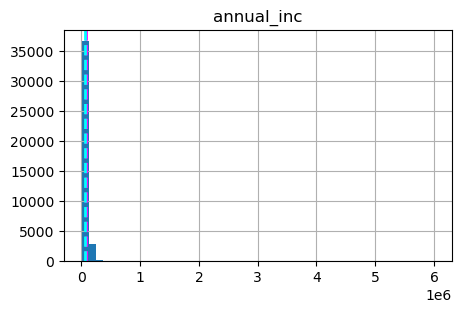

In [13]:
# Plot a histogram for each numeric feature
numeric_features = ['loan_amnt', 'term', 'annual_inc']
for col in numeric_features:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem not quite distributed normally distributed, especially the term.

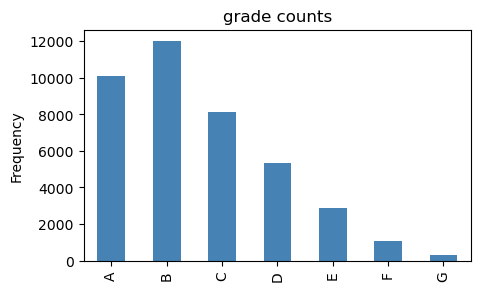

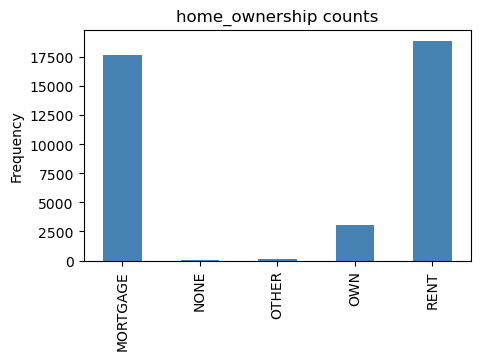

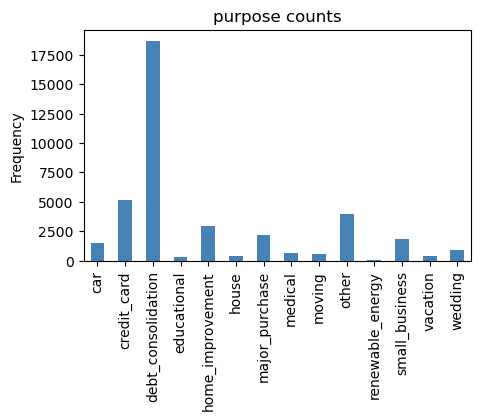

In [14]:
# plot a bar plot for each categorical feature
categorical_features = ['grade','home_ownership','purpose']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    #ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

*   **grade**: most of them has B grading
*   **homeownership**: most are mortgage and rent than owning a house
*   **purpose**: most common purpose is for debt consolidation

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the interest rate we want to be able to predict.

For the numeric features, we can calculate the correlation between interest rate and visualize it with the heat map.

### 3.3.3. Correlation between the variables and interest rate

Text(0.5, 1.0, 'Heatmap for correlation between interest rate and numeric features\n')

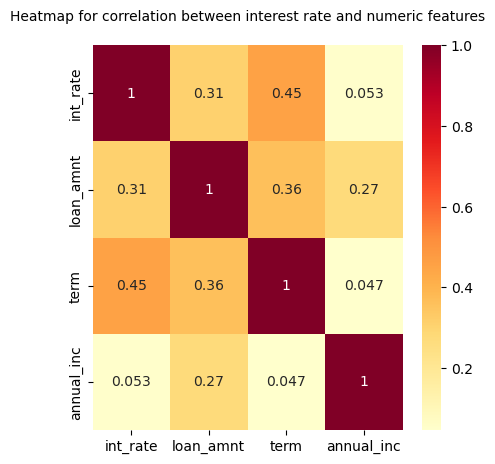

In [15]:
# Heatmap for correlation between interest rate and numeric features
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd", annot=True)
plt.title('Heatmap for correlation between interest rate and numeric features\n', fontsize = 10)

From the heatmap, it seems that higher term tends to coincide with higher interest rate.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of interest rate counts for each category.

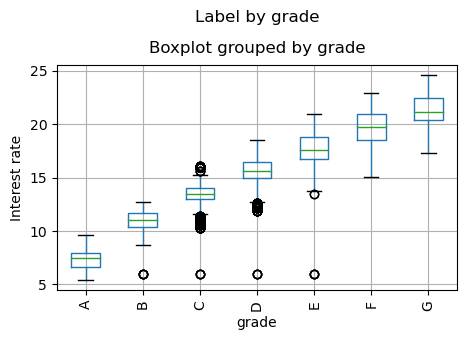

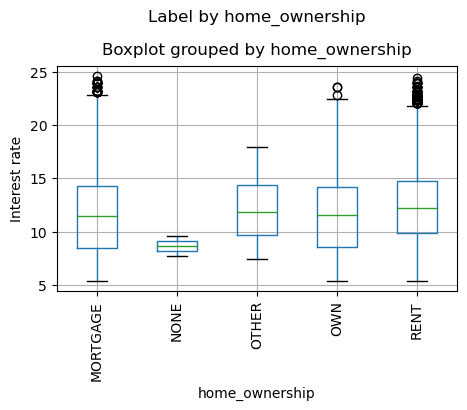

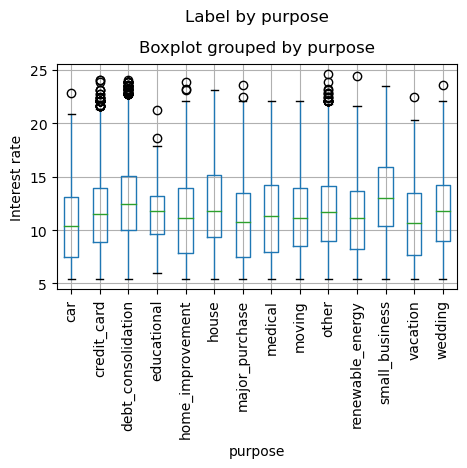

In [16]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    data.boxplot(column = 'int_rate', by = col, ax = ax)
    ax.set_title('Label by ' + col + '\n\n')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel("Interest rate")
plt.show()

There seems to have a diagonal trend showing that higher interest rate tend to coincide with grade. To see this better, encode these categorical features to numbers and visualize with the heatmap

In [17]:
# encoding categorical features 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

Text(0.5, 1.0, 'Heatmap for correlation between interest rate and all variables\n')

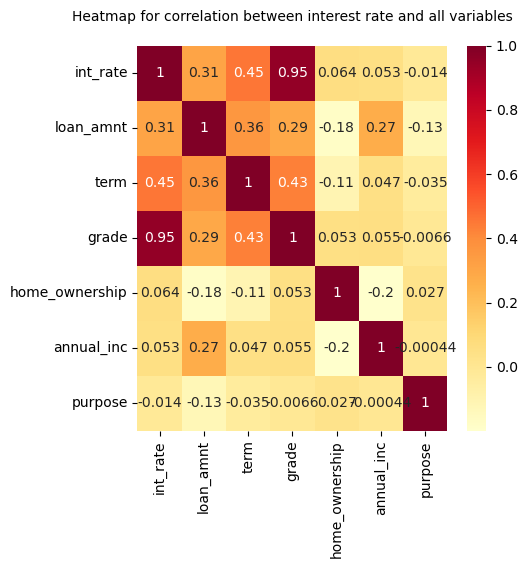

In [18]:
# Heatmap for correlation between interest rate and all variables
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd", annot=True)
plt.title('Heatmap for correlation between interest rate and all variables\n', fontsize = 10)

As seen from the heatmap, interest rate is 
* highly correlated with grade 
* moderately correlated with home ownership
* weakly correlated with loan amount

# IV. DATA PREPARATION

Step include:
* Remove 246 duplicates found above
* Categorical variables are already transformed from previous step (Data Understanding) -> no need to do it again here

## 4.1. Remove duplicates

In [19]:
# Remove 246 duplicate rows
data.drop_duplicates(inplace=True)

# check to see if there is anymore duplicates in the data
data.duplicated().sum()

0

In [20]:
# check dataset after removing duplicates
data.shape

(39540, 7)

# V. MODELLING

Steps include:
* Split dataset into training and test sets with ratio of 70-30
* Train & evaluate models
    * Multiple Linear Regression
    * Lasso
    * Ridge
    * Elastic Net
    * Decision Tree
    * Random Forest
    * Gradient Boosting
    * KNN    
    * SVR
* Evaluating the model using:
    * Coefficient of Determination (known as R-squared or R2)
    * Mean Square Error (MSE)

## 5.1 Split the dataset into training and test sets with ratio 70%-30%

To randomly split the data, we'll use the train_test_split function in the scikit-learn library.

In [22]:
# Separate features and labels
X, y = data[['loan_amnt','term', 'grade','home_ownership','annual_inc','purpose']].values, data['int_rate'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.0000e+03 3.6000e+01 0.0000e+00 0.0000e+00 8.0400e+04 7.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 0.0000e+00 6.2400e+04 6.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 4.0000e+00 4.4000e+04 9.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 3.0000e+00 5.0112e+04 9.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 0.0000e+00 2.8800e+04 0.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 4.0000e+00 5.0400e+04 9.0000e+00]
 [1.0000e+03 3.6000e+01 0.0000e+00 0.0000e+00 1.3560e+05 6.0000e+00]
 [1.2000e+03 3.6000e+01 0.0000e+00 3.0000e+00 3.6000e+04 1.0000e+00]
 [1.2500e+03 3.6000e+01 0.0000e+00 3.0000e+00 7.0000e+04 6.0000e+00]
 [1.3000e+03 3.6000e+01 0.0000e+00 0.0000e+00 2.4000e+04 0.0000e+00]]

Labels:
[5.42 5.42 5.42 5.42 5.42 5.42 5.42 5.42 5.42 5.42]


In [23]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 27678 rows
Test Set: 11862 rows


## 5.2. Training & Evaluating Models

The target variable is interest rate. We'll train with 11 following models:
* Multiple Linear Regression
* Lasso
* Ridge
* Elastic Net
* Decision Tree
* Random Forest
* Gradient Boosting
* KNN    
* SVR

Evaluating the model using:
* Coefficient of Determination (known as R-squared or R2)
* Mean Square Error (MSE)

### 5.2.1. Linear Regression


Model:  LinearRegression() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.9041212610416466
Mean Square Error (MSE): 1.326535153261166
Root Mean Square Error (RMSE): 1.1517530782512222 

******************************************************************************** 



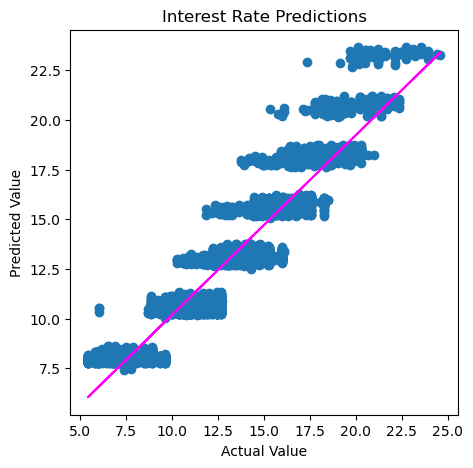

In [26]:
from sklearn.linear_model import LinearRegression

# Fit a lasso model on the training set
model = LinearRegression().fit(X_train, y_train)
print ("\nModel: ",model,'\n')

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [27]:
model.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### 5.2.2. Lasso

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown.

You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

* **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model
* **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
* **Coefficient of Determination (usually known as R-squared or R2)**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data.

Model:  Lasso() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.8613422831440072
Mean Square Error (MSE): 1.9184058705684777
Root Mean Square Error (RMSE): 1.3850652946949749 

******************************************************************************** 



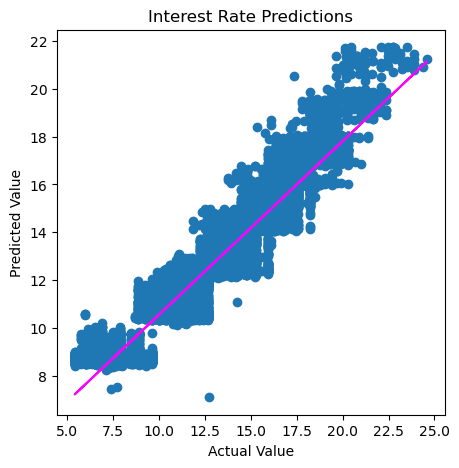

In [28]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.3. Ridge

Model:  Ridge(alpha=1) 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.9041214415612798
Mean Square Error (MSE): 1.3265326556726291
Root Mean Square Error (RMSE): 1.151751993995508 

******************************************************************************** 



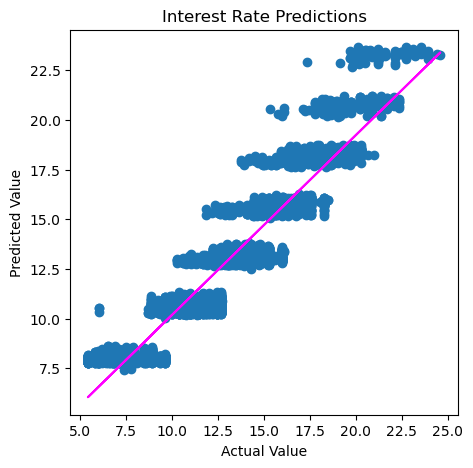

In [30]:
from sklearn.linear_model import Ridge

# Train the model
model = Ridge(alpha=1).fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.4. Elastic Net

Model:  ElasticNet() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.8268366221093817
Mean Square Error (MSE): 2.3958106930164154
Root Mean Square Error (RMSE): 1.5478406549178165 

******************************************************************************** 



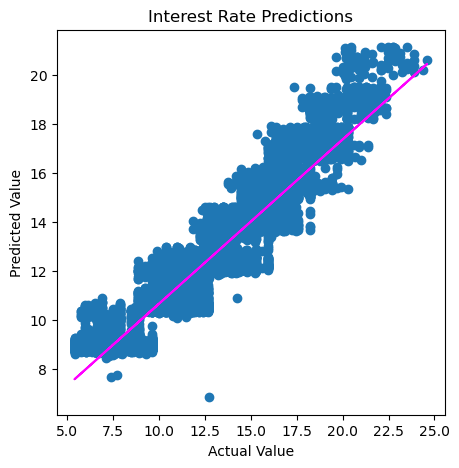

In [31]:
from sklearn.linear_model import ElasticNet

# Train the model
model = ElasticNet().fit(X_train, y_train)
print("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.5. Decision Tree

Model:  DecisionTreeRegressor() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.8580290192746295
Mean Square Error (MSE): 1.964246700793297
Root Mean Square Error (RMSE): 1.401515858202574 

******************************************************************************** 



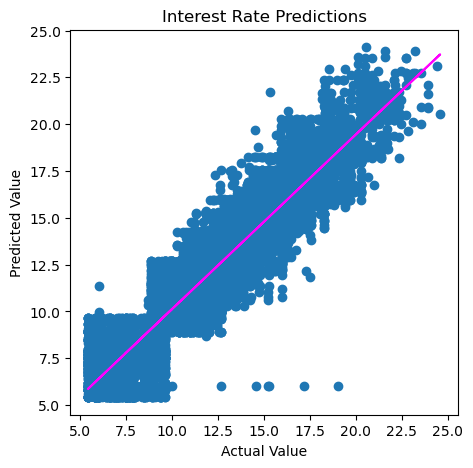

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.6. Random Forest

Model:  RandomForestRegressor() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.9146529496707041
Mean Square Error (MSE): 1.180823441348539
Root Mean Square Error (RMSE): 1.0866570026225106 

******************************************************************************** 



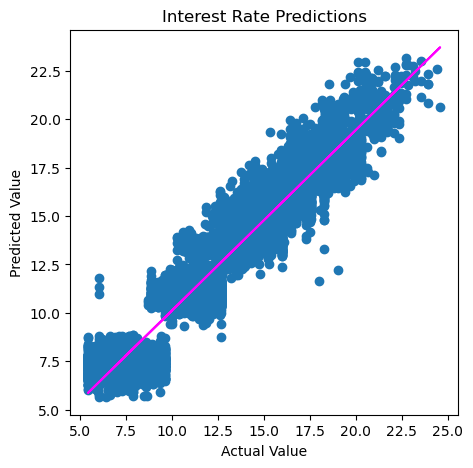

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.7. Gradient Boosting

Model:  GradientBoostingRegressor() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.9286918279154952
Mean Square Error (MSE): 0.986587829716661
Root Mean Square Error (RMSE): 0.9932712770017368 

******************************************************************************** 



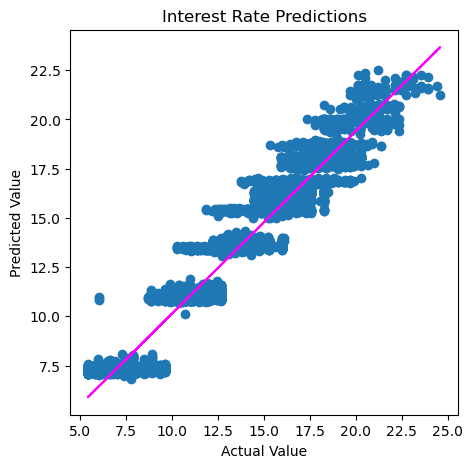

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
model = GradientBoostingRegressor().fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [34]:
model.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.9286868598016398
Mean Square Error (MSE): 0.986656566307757
Root Mean Square Error (RMSE): 0.9933058775159629 

******************************************************************************** 



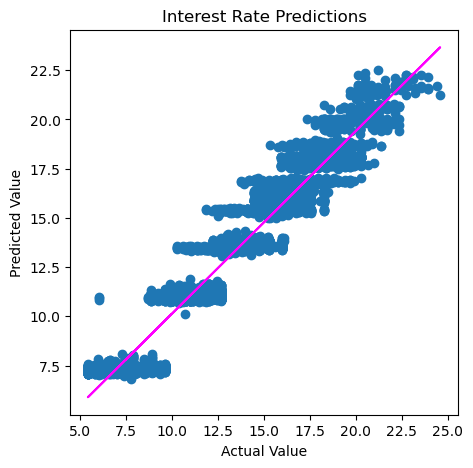

In [41]:
# Hyperparameter Tuning/Grid Search for Gradient Boosting algorithm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.8. KNN

Model:  KNeighborsRegressor() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.10833646222188398
Mean Square Error (MSE): 12.336656078233014
Root Mean Square Error (RMSE): 3.5123576239091903 

******************************************************************************** 



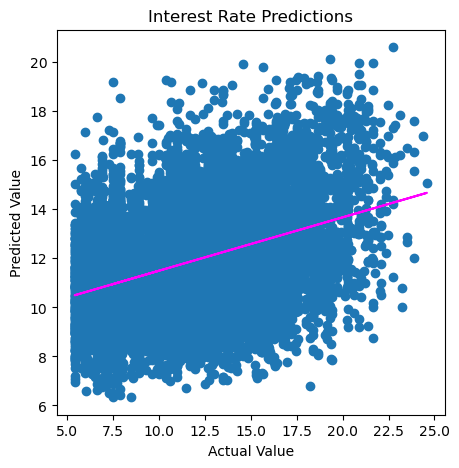

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model
model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print ("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### 5.2.9. SVR

Model:  SVR() 

********************************************************************************

Coefficient of Determination (known as R-squared or R2): 0.10020009107684025
Mean Square Error (MSE): 12.449227253669191
Root Mean Square Error (RMSE): 3.5283462491185853 

******************************************************************************** 



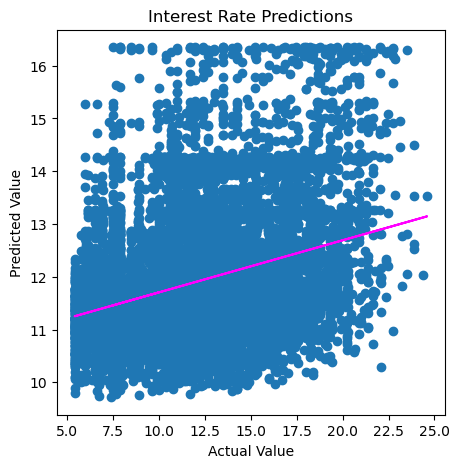

In [38]:
from sklearn.svm import SVR

# Train the model
model = SVR().fit(X_train, y_train)
print("Model: ",model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print("*"*80)
print("\nCoefficient of Determination (known as R-squared or R2):", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse,'\n')
print("*"*80,'\n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Interest Rate Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()